## **Librerías**

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = False

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from sklearn.metrics import mean_squared_error

In [131]:
from math import sqrt

## **Datos**

In [73]:
df_fem_births = pd.read_csv(
    '../../Data/daily-total-female-births.csv',
    index_col=0,
    parse_dates=True
)

In [74]:
df_fem_births.sample()

,births
date,
1959-01-27,39


In [75]:
df_fem_births.columns = ['Births']

## **Moving Average Smoothing**

### **As Data Preparation**

In [77]:
df_fem_births_dp = df_fem_births.copy()

In [78]:
df_fem_births_dp['Births_MA_3'] = df_fem_births_dp['Births'].rolling(window=3).mean()
df_fem_births_dp['Births_MA_5'] = df_fem_births_dp['Births'].rolling(window=5).mean()

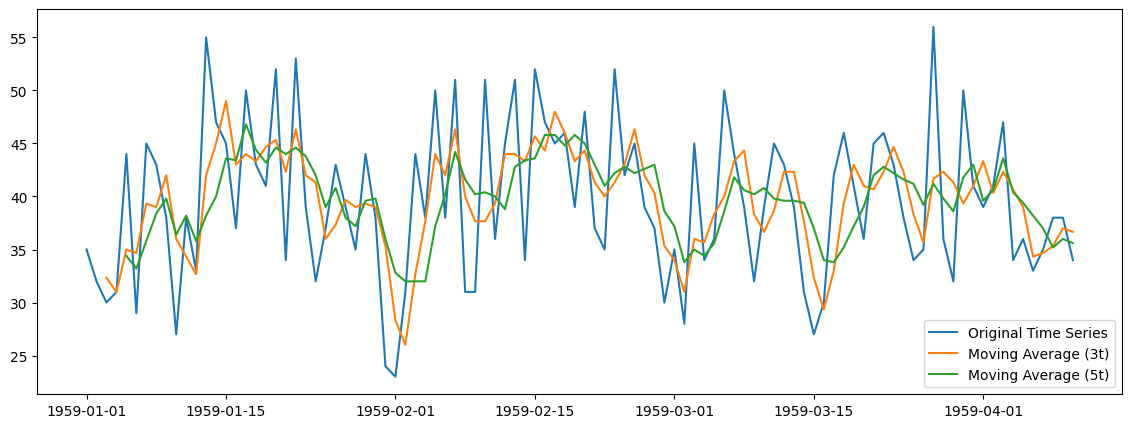

In [79]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.plot(df_fem_births_dp['Births'][:100], label='Original Time Series')
plt.plot(df_fem_births_dp['Births_MA_3'][:100], label='Moving Average (3t)')
plt.plot(df_fem_births_dp['Births_MA_5'][:100], label='Moving Average (5t)')

plt.legend()

plt.show()

### **As Feature Engineering**

In [80]:
df_fem_births_fe = df_fem_births.copy()

In [95]:
df_fem_births_fe['t-1'] = df_fem_births_fe['Births'].shift(1)

In [118]:
df_fem_births_fe['mean'] = df_fem_births_fe['t-1'].rolling(window=3).mean()

In [122]:
df_fem_births_fe = df_fem_births_fe[['mean', 't-1', 'Births']]

In [125]:
df_fem_births_fe.head()

,mean,t-1,Births
date,,,
1959-01-01,NaN,NaN,35
1959-01-02,NaN,35.0,32
1959-01-03,NaN,32.0,30
1959-01-04,32.333333,30.0,31
1959-01-05,31.000000,31.0,44


### **As Prediction**

In [126]:
df_fem_births_p = df_fem_births.copy()

In [145]:
df_fem_births_p['t-1'] = df_fem_births_p['Births'].shift(1)

In [165]:
df_fem_births_p = df_fem_births_p[['t-1', 'Births', 'pred']]

In [214]:
len(df_fem_births_p)

365

In [220]:
mse_values = []

for i in range(3,100):

    window_value = i

    y_pred = df_fem_births_p['t-1'].rolling(window=window_value).mean()[window_value:]
    y_test = df_fem_births_p['Births'][window_value:]

    mse_value = sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))

    mse_values.append(mse_value)

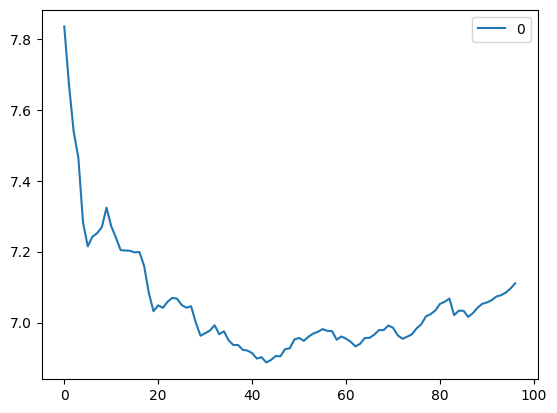

In [221]:
pd.DataFrame(mse_values).plot()

plt.show()